## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_neurons):
        
        if i == 0:
            x = keras.layers.Dense(units = n_units,
                                  activation = "relu",
                                  name = "hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            
        else:
            x = keras.layers.Dense(units = n_units,
                                   activation = "relu",
                                   name = "hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units,activation = "softmax",name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for size in BATCH_SIZE:
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=size,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp = "Batch Size = " + str(size)
    results[exp] = {'train-loss':train_loss,
                      'valid-loss':valid_loss,
                      'train-acc':train_acc,
                      'valid-acc':valid_acc
                    }

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_25 (Batc (None, 128)               512 

50000/50000 [==============================] - 29s 585us/step - loss: 1.3598 - accuracy: 0.5164 - val_loss: 1.4719 - val_accuracy: 0.4800
Epoch 7/10
50000/50000 [==============================] - 29s 586us/step - loss: 1.3409 - accuracy: 0.5210 - val_loss: 1.4551 - val_accuracy: 0.4808
Epoch 8/10
50000/50000 [==============================] - 29s 585us/step - loss: 1.3240 - accuracy: 0.5270 - val_loss: 1.4666 - val_accuracy: 0.4701
Epoch 9/10
50000/50000 [==============================] - 29s 586us/step - loss: 1.2908 - accuracy: 0.5431 - val_loss: 1.5515 - val_accuracy: 0.4596
Epoch 10/10
50000/50000 [==============================] - 29s 585us/step - loss: 1.2581 - accuracy: 0.5519 - val_loss: 1.4494 - val_accuracy: 0.4795
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________

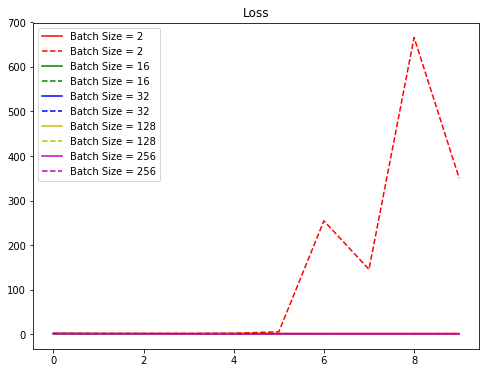

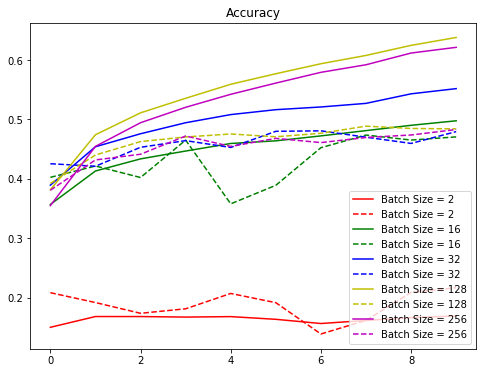

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
def build_mlp_2(input_shape, output_units = 10, num_neurons = [512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_neurons):
        
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units = n_units,
                                  activation = "relu",
                                  name = "hidden_layer"+str(i+1))(x)
            
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units = n_units,
                                   activation = "relu",
                                   name = "hidden_layer"+str(i+1))(x)
            
            
    out = keras.layers.Dense(units=output_units,activation = "softmax",name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

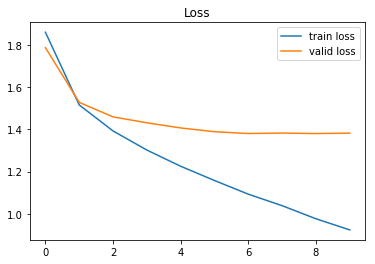

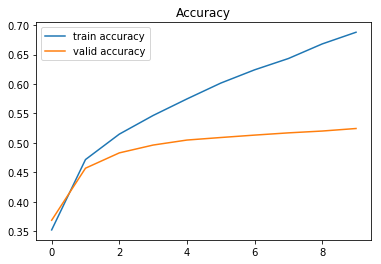

In [10]:
model = build_mlp_2(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy",metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=size,
         validation_data=(x_test,y_test),
         shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
valid_acc = model.history.history['val_accuracy']

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [11]:
def build_mlp_3(input_shape, output_units = 10, num_neurons = [512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i , n_units in enumerate(num_neurons):
        
        x = keras.layers.Dense(units = n_units,
                               activation = "relu",
                               name = "hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)

    out = keras.layers.Dense(units=output_units,activation = "softmax",name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

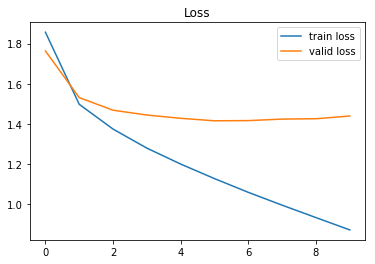

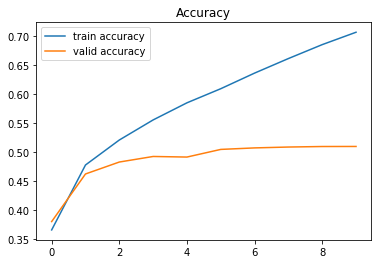

In [12]:
model = build_mlp_3(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy",metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=size,
         validation_data=(x_test,y_test),
         shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
valid_acc = model.history.history['val_accuracy']

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()